# Emergency - 911 Calls in Montgomery County, PA

Project uses 911 call data (12/2015 - 8/2016) from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



** Import data analysis annd vizualization libraries. **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


** Read in the csv file as a dataframe called df_calls. **

In [2]:
df_calls = pd.read_csv('911.csv')

** Check the info of df_calls. **

In [3]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Top 5 zipcodes and townships for 911 calls. **

In [120]:
df_calls['zip'].value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [121]:
df_calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [122]:
#New column that extracts call info from title column to use for further analysis
df_calls['Reason'] = df_calls['title'].apply(lambda x: x.split(':')[0])

** Check most common Reason calls **

In [123]:
df_calls['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Countplot of Reason **

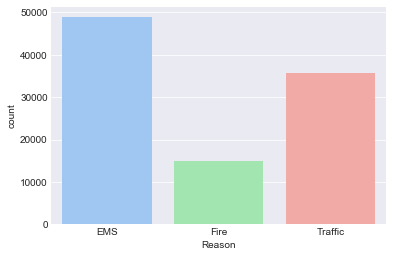

In [136]:
sns.countplot('Reason', data=df_calls, palette='pastel')

** Convert timeStamp column in dataframe from strings to DateTime objects and create new columns for further analysis **

In [137]:
df_calls['timeStamp'] = pd.to_datetime(df_calls['timeStamp'])

In [138]:
df_calls['Hour'] = df_calls['timeStamp'].apply(lambda time: time.hour)
df_calls['Month'] = df_calls['timeStamp'].apply(lambda time: time.month)
df_calls['Day of Week'] = df_calls['timeStamp'].apply(lambda time: time.dayofweek)

** Change Day of Week column from integer to string **

In [139]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_calls['Day of Week'] = df_calls['Day of Week'].map(dmap)

** Countplot of calls based on day of week and month, sorted by type of call. **

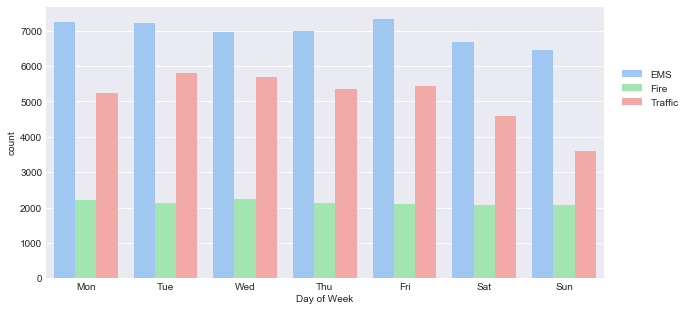

In [140]:
order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(10,5))
sns.countplot('Day of Week', data = df_calls, hue = 'Reason', palette='pastel',order = order )
plt.legend(loc= 'upper right', bbox_to_anchor=(1.15,.8))

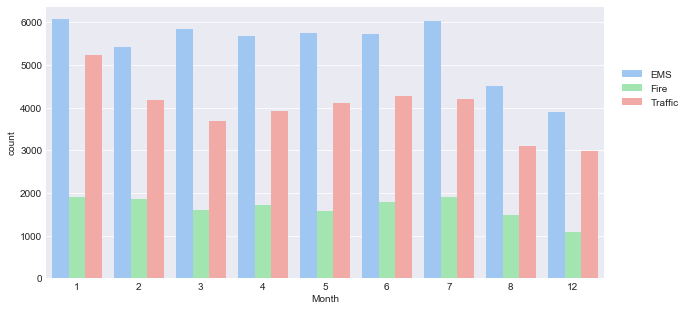

In [141]:
plt.figure(figsize=(10,5))
sns.countplot('Month', data = df_calls, hue = 'Reason', palette='pastel')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.15,.8))

** Incomplete data, no data for the months of September - November which explains the odd plot **

**Further EDA by visualizing count plots of 911 calls for the months that we have data for. ** 

In [143]:
# New column which will use entire date as opposed to seperating the information like before
df_calls['Date'] = df_calls['timeStamp'].apply(lambda time:time.date())

** Plots that explore the Reason for the 911 calls throughout the months of January through September.**

<function matplotlib.pyplot.tight_layout>

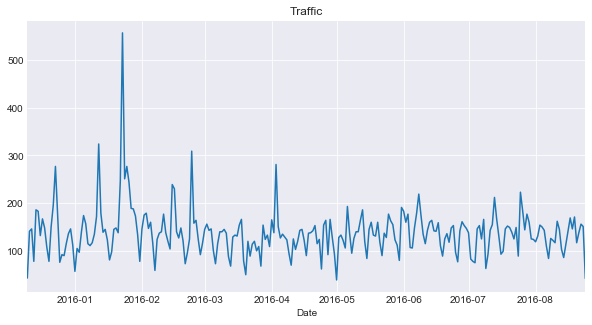

In [144]:
plt.figure(figsize=(10,5))
plt.title('Traffic')
df_calls[df_calls['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

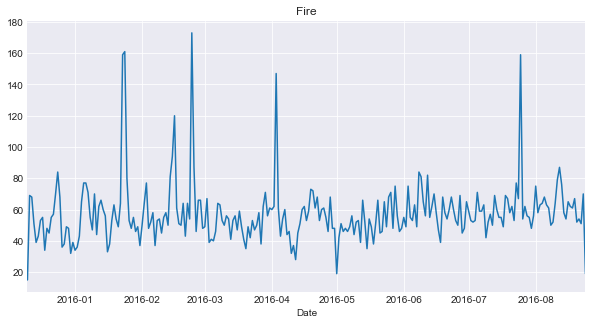

In [145]:
plt.figure(figsize=(10,5))
plt.title('Fire')
df_calls[df_calls['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

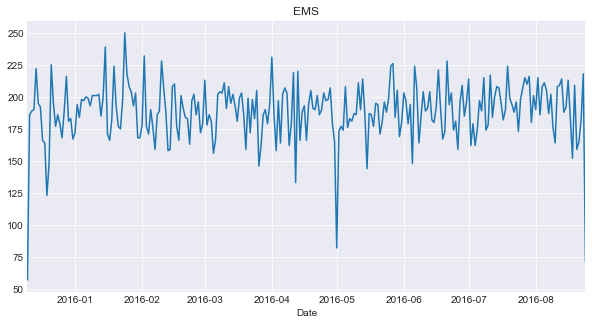

In [146]:
plt.figure(figsize=(10,5))
plt.title('EMS')
df_calls[df_calls['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout


** Heatmap to show realationship of calls between Hour and Day of Week for the data. **

In [155]:
df_heatHour = df_calls.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
df_heatHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5,1,'Relationship of calls between Hour and DoW')

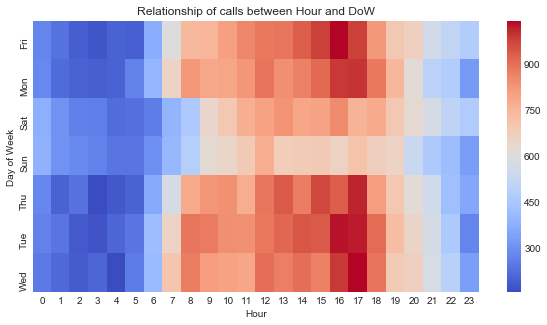

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heatHour, cmap='coolwarm')
plt.title('Relationship of calls between Hour and DoW')

Text(0.5,1,'Relationship of calls between Hour and DoW')

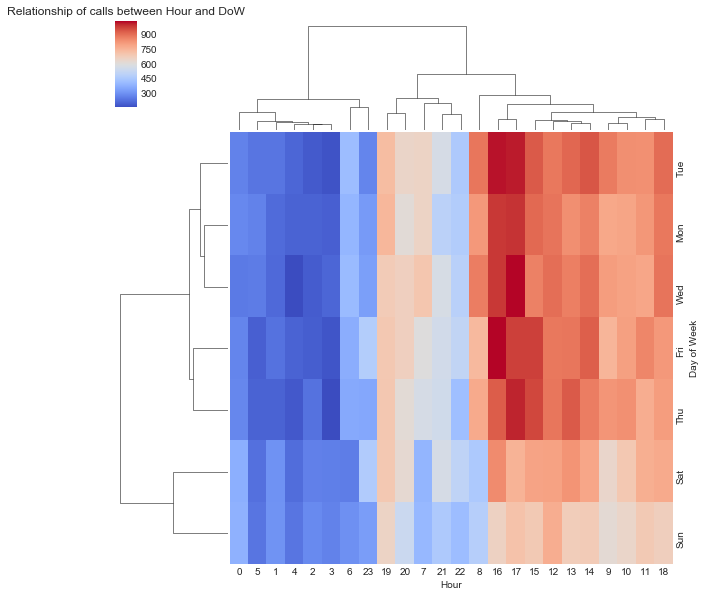

In [161]:
sns.clustermap(df_heatHour, cmap='coolwarm')
plt.title('Relationship of calls between Hour and DoW')

** Heatmap to show realationship of calls between Month and Day of Week for the data. **

In [158]:
df_heatMonth = df_calls.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
df_heatMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5,1,'Relationship of calls between Month and DoW')

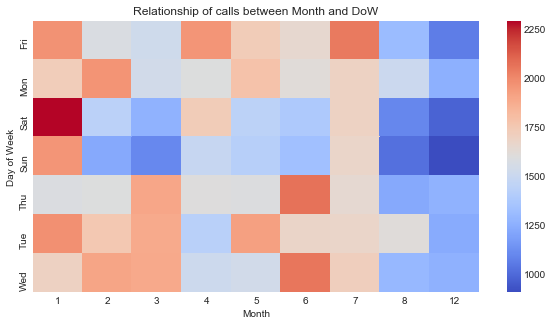

In [162]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heatMonth, cmap='coolwarm')
plt.title('Relationship of calls between Month and DoW')

Text(0.5,1,'Relationship of calls between Month and DoW')

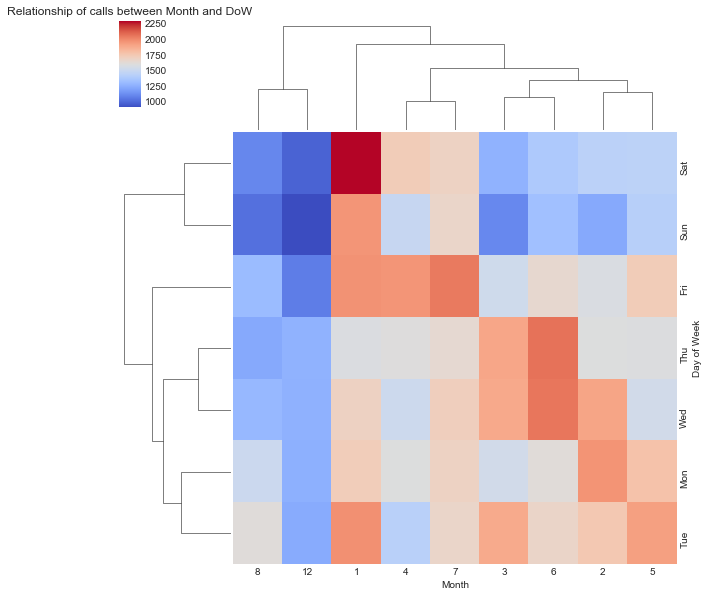

In [163]:
plt.figure(figsize=(10,5))
sns.clustermap(df_heatMonth, cmap='coolwarm')
plt.title('Relationship of calls between Month and DoW')